In [ ]:
# Electron cross-section/range/...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("datanuc.txt", sep=" ", header=None)  
data.head()

0      1       2    3          4          5        6    7   \
0     Photon    NaN     NaN  NaN   Coherent   Photoel.  Nuclear  NaN   
1     Energy    NaN     NaN  NaN   Scatter.    Absorb.      NaN  Pr.   
2  1.000E-03  12.39  4994.0  0.0  0.000E+00  5.007E+03      NaN  NaN   
3  1.500E-03  11.90  2247.0  0.0  0.000E+00  2.259E+03      NaN  NaN   
4  2.000E-03  11.35  1220.0  0.0  0.000E+00  1.231E+03      NaN  NaN   

         8     9     10        11  12  
0  Electron  Tot.    w/       NaN NaN  
1      Prd.   Pr.  Prd.  Coherent NaN  
2       NaN   NaN   NaN       NaN NaN  
3       NaN   NaN   NaN       NaN NaN  
4       NaN   NaN   NaN       NaN NaN

In [3]:
s = len(data)
energy = data[data.columns[0]].iloc[2:s].astype(float).tolist()
cohscat = data[data.columns[1]].iloc[2:s].astype(float).tolist()
photoele = data[data.columns[2]].iloc[2:s].astype(float).tolist()
ppnuc = data[data.columns[3]].iloc[2:s].astype(float).tolist()
ppele = data[data.columns[4]].iloc[2:s].astype(float).tolist()
total = data[data.columns[5]].iloc[2:s].astype(float).tolist()

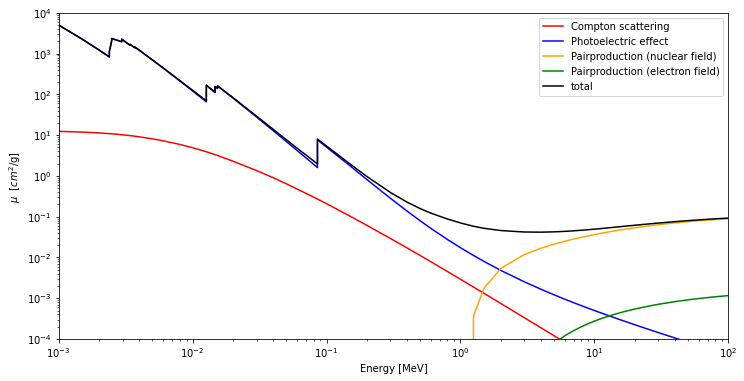

In [4]:
fig = plt.figure(figsize=(12,6))

plt.plot(energy, cohscat, color = 'red', label='Compton scattering')
plt.plot(energy, photoele, color = 'blue', label='Photoelectric effect')
plt.plot(energy, ppnuc, color = 'orange', label='Pairproduction (nuclear field)')
plt.plot(energy, ppele, color = 'green', label='Pairproduction (electron field)')
plt.plot(energy, total, color = 'black', label='total')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.0001, 10000)
plt.xlim(0.001,  100)

plt.xlabel('Energy [MeV]')
plt.ylabel('$\mu$  [$cm^{2}$/g] ')

In [12]:
data2 = pd.read_csv("electronrange.txt", sep=" ", header=None)  
data2.head()

0       1        2       3         4         5         6
0  0.0100  12.430  0.01267  12.440  0.000491  0.000517  0.000517
1  0.0125  10.640  0.01339  10.660  0.000709  0.000642  0.000663
2  0.0150   9.365  0.01395   9.379  0.000959  0.000763  0.000815
3  0.0175   8.397  0.01439   8.412  0.001242  0.000883  0.000973
4  0.0200   7.638  0.01475   7.653  0.001554  0.001000  0.001137

In [21]:
s2 = len(data)
energy2 = data2[data2.columns[0]].iloc[2:s2].astype(float).tolist()
Range2 = data2[data2.columns[4]].iloc[2:s2].astype(float).tolist()
bremess = data2[data2.columns[2]].iloc[2:s2].astype(float).tolist()
ionos = data2[data2.columns[1]].iloc[2:s2].astype(float).tolist()
tot = data2[data2.columns[3]].iloc[2:s2].astype(float).tolist()
k =[]
for i in range(len(bremess)): #bremess fraction
    k.append(bremess[i]/ionos[i])
    

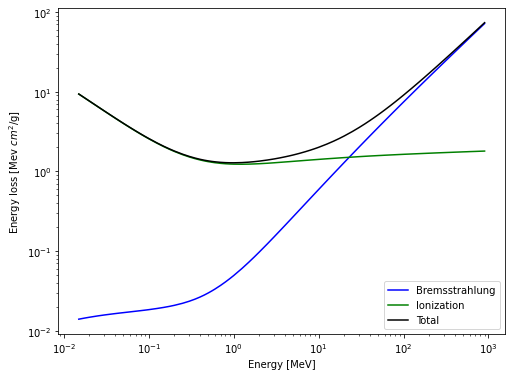

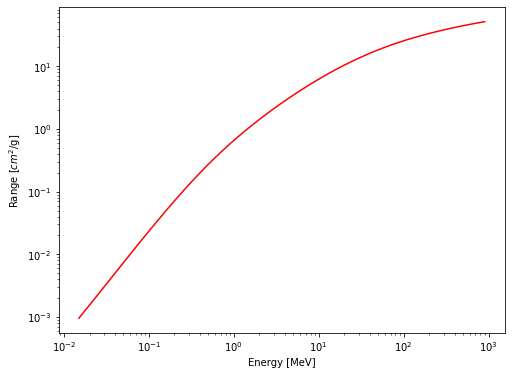

In [35]:
fig = plt.figure(figsize=(8,6))

plt.plot(energy2, bremess, color = 'blue', label='Bremsstrahlung')
plt.plot(energy2, ionos, color = 'green', label='Ionization')
plt.plot(energy2, tot, color = 'black', label='Total')

plt.legend(loc=4)
plt.xscale('log')
plt.yscale('log')
#plt.ylim(0.0001, 10000)
#plt.xlim(0.001,  100)

plt.xlabel('Energy [MeV]')
plt.ylabel('Energy loss [Mev $cm^{2}$/g] ')

fig = plt.figure(figsize=(8,6))

plt.plot(energy2, Range2, color = 'red')

plt.xscale('log')
plt.yscale('log')
#plt.ylim(0.0001, 10000)
#plt.xlim(0.001,  100)

plt.xlabel('Energy [MeV]')
plt.ylabel('Range [$cm^{2}$/g] ')


<ipython-input-254-d5e212932491>:11: RuntimeWarning: divide by zero encountered in true_divide
  t = (x-e) / w
<ipython-input-254-d5e212932491>:71: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='', xy=(3.7,0.8), xytext=(8.7,0.8), arrowprops=dict(arrowstyle= '<|-|>', color='g', lw=1.5,ls='--'))
<ipython-input-254-d5e212932491>:73: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='', xy=(1.7,1), xytext=(3.2,0.7),arrowprops=dict(arrowstyle= '<-', color='b', lw=1.5,ls='--'))
<ipython-input-254-d5e212932491>:75: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='', xy

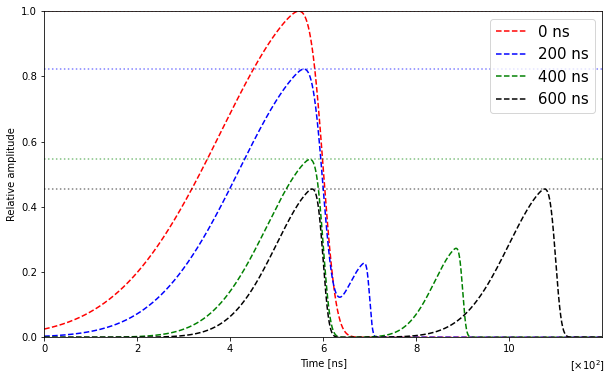

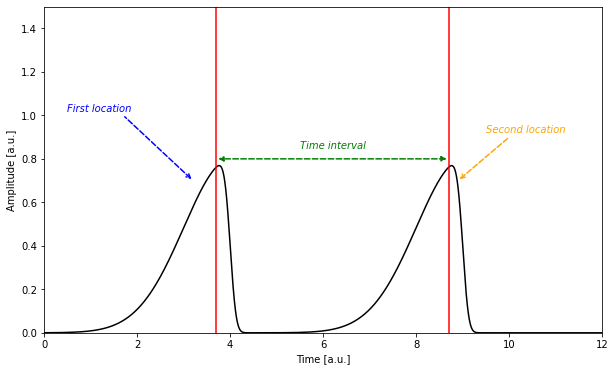

In [254]:
from scipy import stats

#--------------------------------------------------------

#Illustration of signal time difference

NUM_SAMPLES = 100000
SKEW_PARAMS = [10.]

def skew_norm_pdf(x,e=0.1,w=0.1,a=0.1):
    t = (x-e) / w
    return 2.0 * w * stats.norm.pdf(t) * stats.norm.cdf(-a*t)

# generate the skew normal PDF for reference:
location = 200.0
scale = 1.0
x = np.linspace(0,15,10000) 


plt.subplots(figsize=(10,6))
for alpha_skew in SKEW_PARAMS:
    p1 = skew_norm_pdf(x,6,scale,alpha_skew)+skew_norm_pdf(x,11,scale,alpha_skew)
    p2 = skew_norm_pdf(x,6,1.2,alpha_skew)+skew_norm_pdf(x,9,0.6,alpha_skew)
    p3 = skew_norm_pdf(x,6,1.8,alpha_skew)+skew_norm_pdf(x,7,0.5,alpha_skew)
    p4 = skew_norm_pdf(x,6,2.2,alpha_skew)+skew_norm_pdf(x,7,0.,alpha_skew)
    plt.plot(x,p4/max(p4),  '--', color='r', label='0 ns')
    plt.plot(x,p3/max(p4),  '--', color='b', label ='200 ns')
    plt.plot(x,p2/max(p4),  '--', color='g', label = '400 ns')
    plt.plot(x,p1/max(p4),  '--', color='k', label = '600 ns')
    plt.axhline(max(p4/max(p4)), linestyle=':', color='r', alpha=0.5)
    plt.axhline(max(p3/max(p4)), linestyle=':', color='b', alpha=0.5)
    plt.axhline(max(p2/max(p4)), linestyle=':', color='g', alpha=0.5)
    plt.axhline(max(p1/max(p4)), linestyle=':', color='k', alpha=0.5)

plt.ylim(0,1)
plt.xlim(0,12)
plt.xlabel('Time [ns]')
plt.text(11.3, -0.1, ("[×$10^{2}$]"), fontsize=10, color='k')
plt.xticks([0,2,4,6,8,10])
plt.ylabel('Relative amplitude')
plt.legend(loc=1, prop={'size': 15})

plt.subplots(figsize=(10,6))
for alpha_skew in SKEW_PARAMS:
    #p = skew_norm_pdf(x,location,scale,alpha_skew)+skew_norm_pdf(x,2,scale,alpha_skew)
    p = skew_norm_pdf(x,4,scale,alpha_skew)+skew_norm_pdf(x,9,scale,alpha_skew)
    plt.plot(x,p, color='k')
    
plt.ylim(0,1.5)
plt.xlim(0,12)
plt.xlabel('Time [a.u.]')
plt.ylabel('Amplitude [a.u.]')
plt.axvline(3.7, color='red')
plt.axvline(8.7, color='red')
plt.annotate(s='', xy=(3.7,0.8), xytext=(8.7,0.8), arrowprops=dict(arrowstyle= '<|-|>', color='g', lw=1.5,ls='--'))
plt.text(5.5, 0.85, ("Time interval"), fontsize=10, color='g', style='oblique',)
plt.annotate(s='', xy=(1.7,1), xytext=(3.2,0.7),arrowprops=dict(arrowstyle= '<-', color='b', lw=1.5,ls='--'))
plt.text(0.5, 1.02, ("First location"), fontsize=10, color='b', style='oblique',)
plt.annotate(s='', xy=(10,0.9), xytext=(8.9,0.7),arrowprops=dict(arrowstyle= '<-', color='orange', lw=1.5,ls='--'))
plt.text(9.5, 0.92, ("Second location"), fontsize=10, color='orange', style='oblique',)
